# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R с помощью готовой формулы

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    return np.pi**(D / 2) / sp.gamma(1 + D / 2) * R**D

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

На графике отметим точные значения для $d=1, 2, 3$. Для них объём сферы единичного радиуса равен $2$, $\pi$ и $4 \pi / 3$ соответственно

<IPython.core.display.Javascript object>


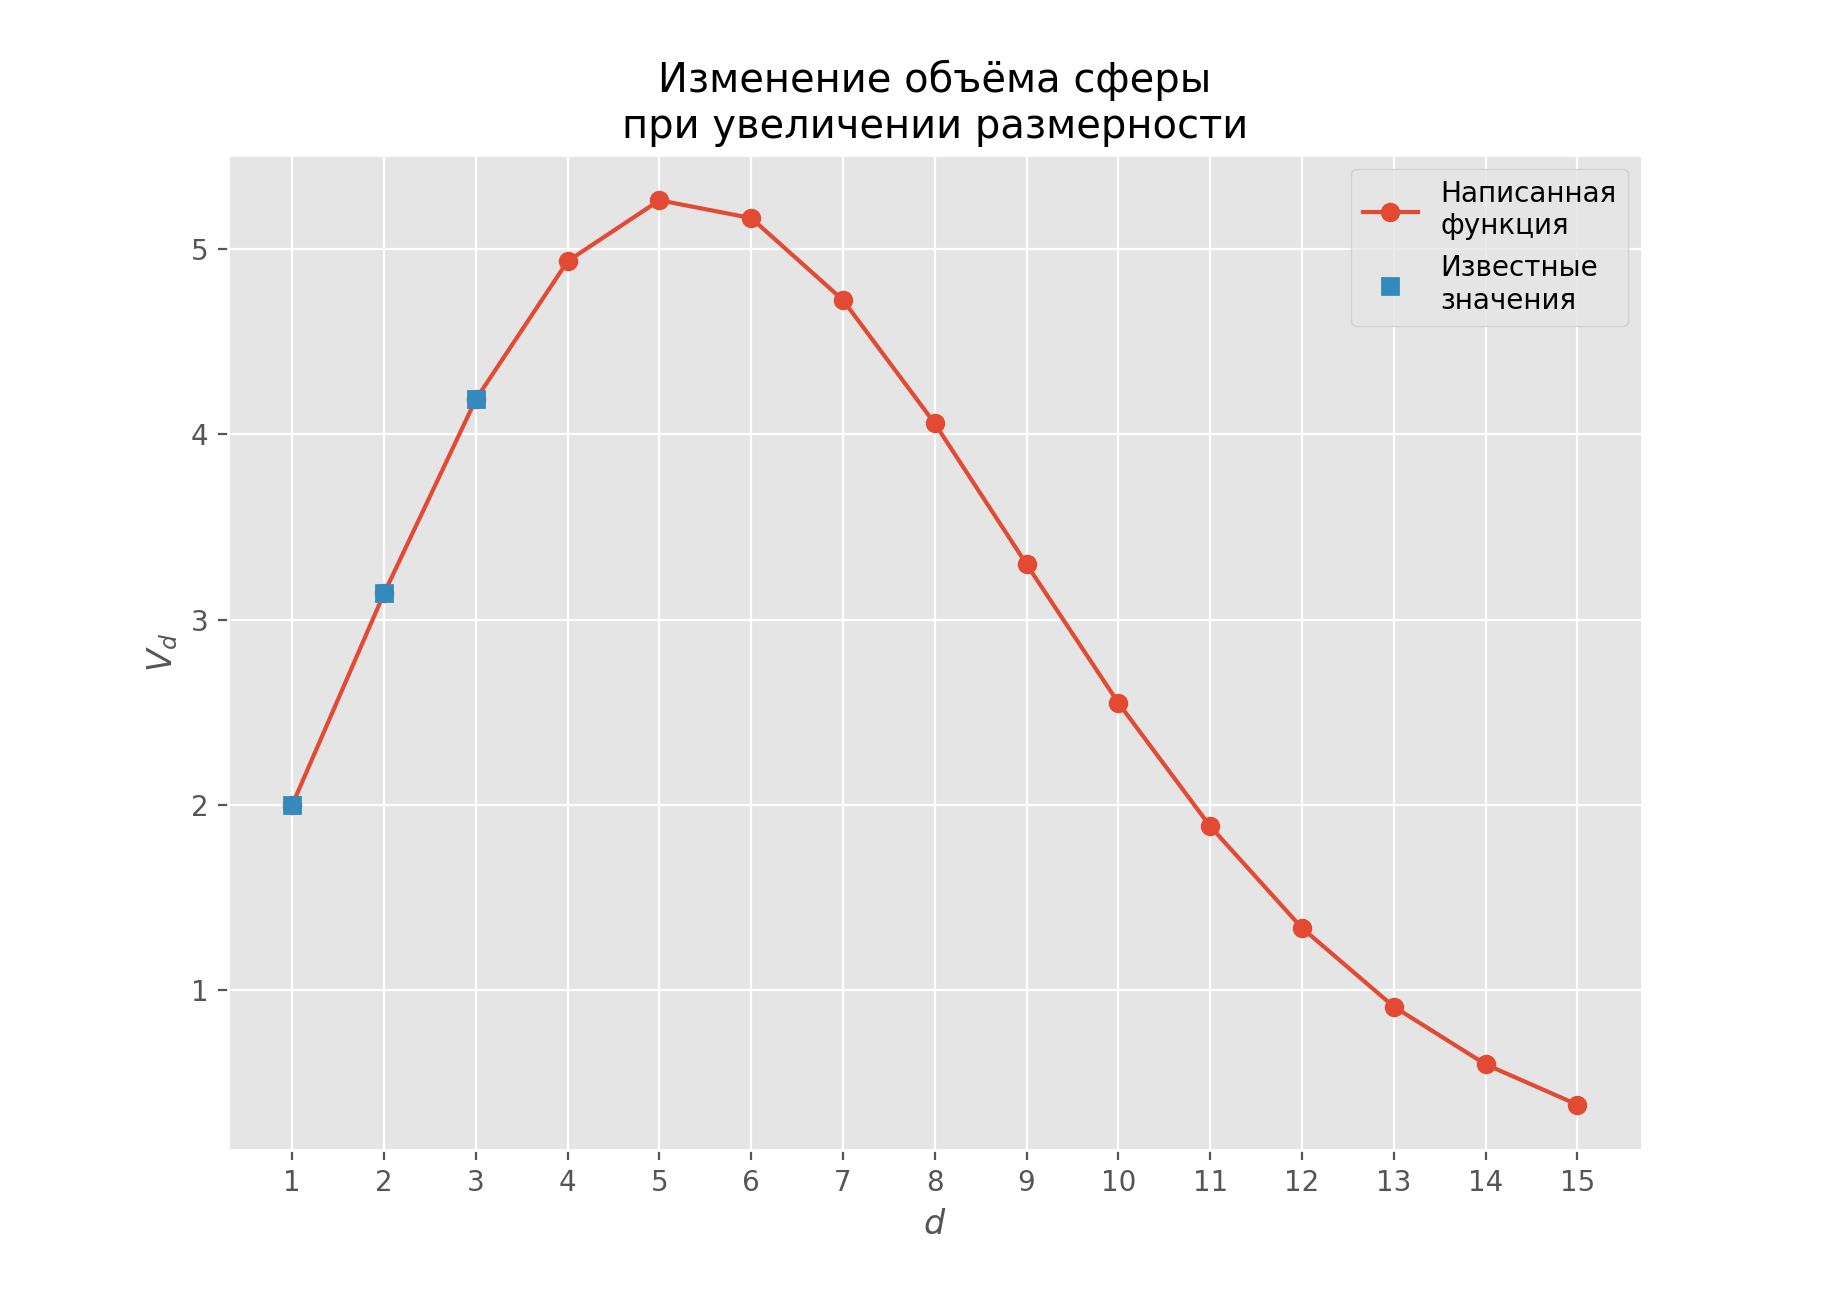

Text(0.5, 1.0, 'Изменение объёма сферы\nпри увеличении размерности')

In [3]:
dim = np.arange(1, 16)
vol = getSphereVolumeExact(dim)
dim_check = [1, 2, 3]
vol_check = [2, np.pi, 4*np.pi/3]

plt.figure()
plt.plot(dim, vol, 'o-', label='Написанная\nфункция')
plt.plot(dim_check, vol_check, 's', label='Известные\nзначения')
plt.legend()
plt.xticks(dim)
plt.xlabel('$d$')
plt.ylabel('$V_d$')
plt.title('Изменение объёма сферы\nпри увеличении размерности')

Известные значения точно легли на график, то есть функция считает объём правильно

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [4]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы 
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    dots = np.random.uniform(-1, 1, (N, D))
    r = np.array([sum(dots[i,:]**2) for i in range(N)])
    V = sum((r < 1).astype(int)) / N * (2 * R)**D
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

<IPython.core.display.Javascript object>


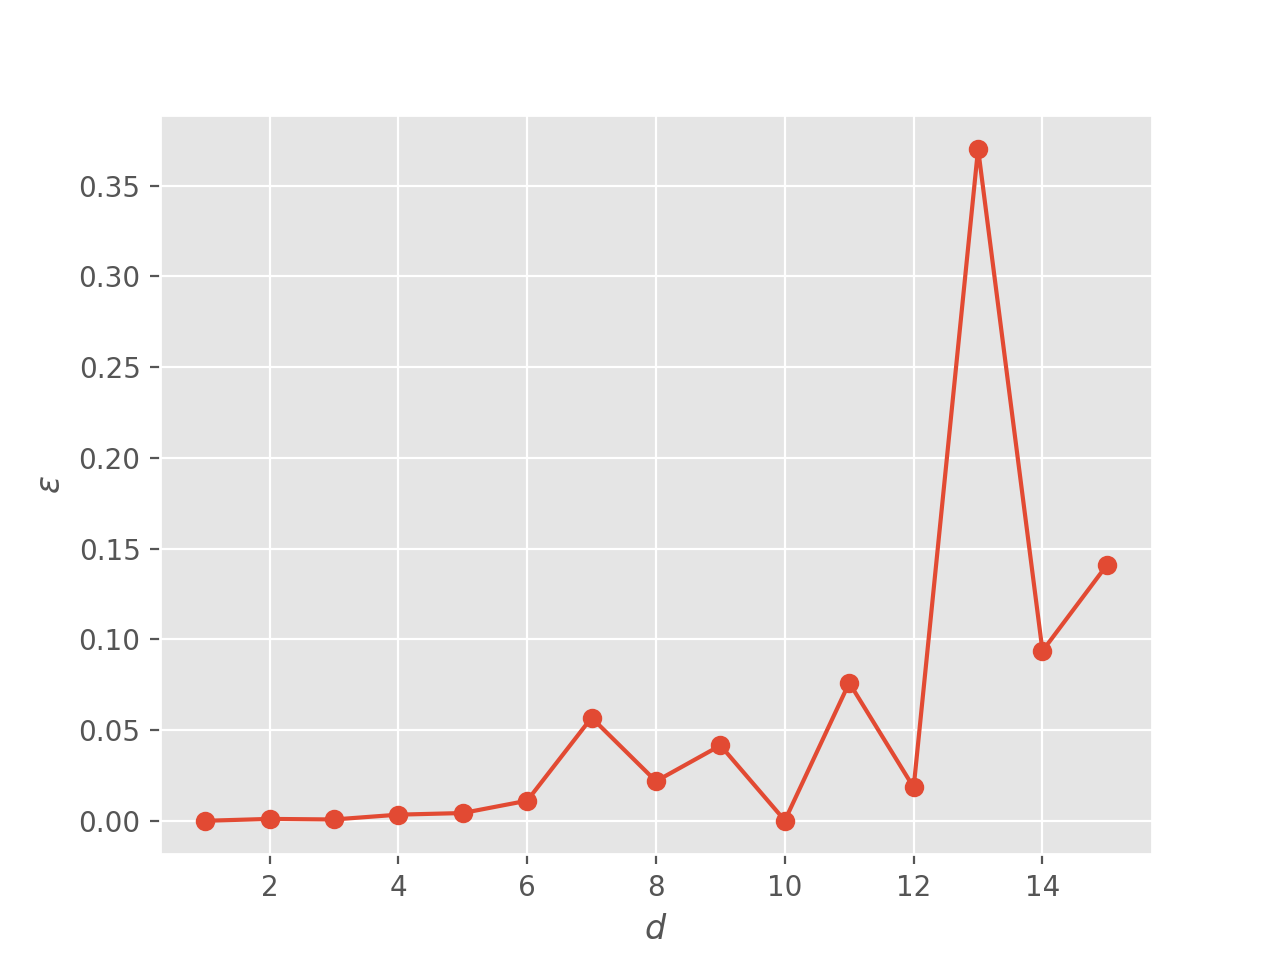

Text(0, 0.5, '$\\epsilon$')

In [5]:
N = 100000
vol_r = [getSphereVolumePseudorandom(N, d) for d in dim]

plt.figure()
plt.plot(dim, abs((vol - vol_r) / vol), 'o-')
plt.xlabel('$d$') 
plt.ylabel('$\epsilon$')

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [6]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [7]:
sobol_seq.i4_sobol_generate?

In [7]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    dots = sobol_seq.i4_sobol_generate(D, N) * 2 - 1
    r = np.array([sum(dots[i,:]**2) for i in range(N)])
    V = sum((r < 1).astype(int)) / N * (2 * R)**D
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

<IPython.core.display.Javascript object>


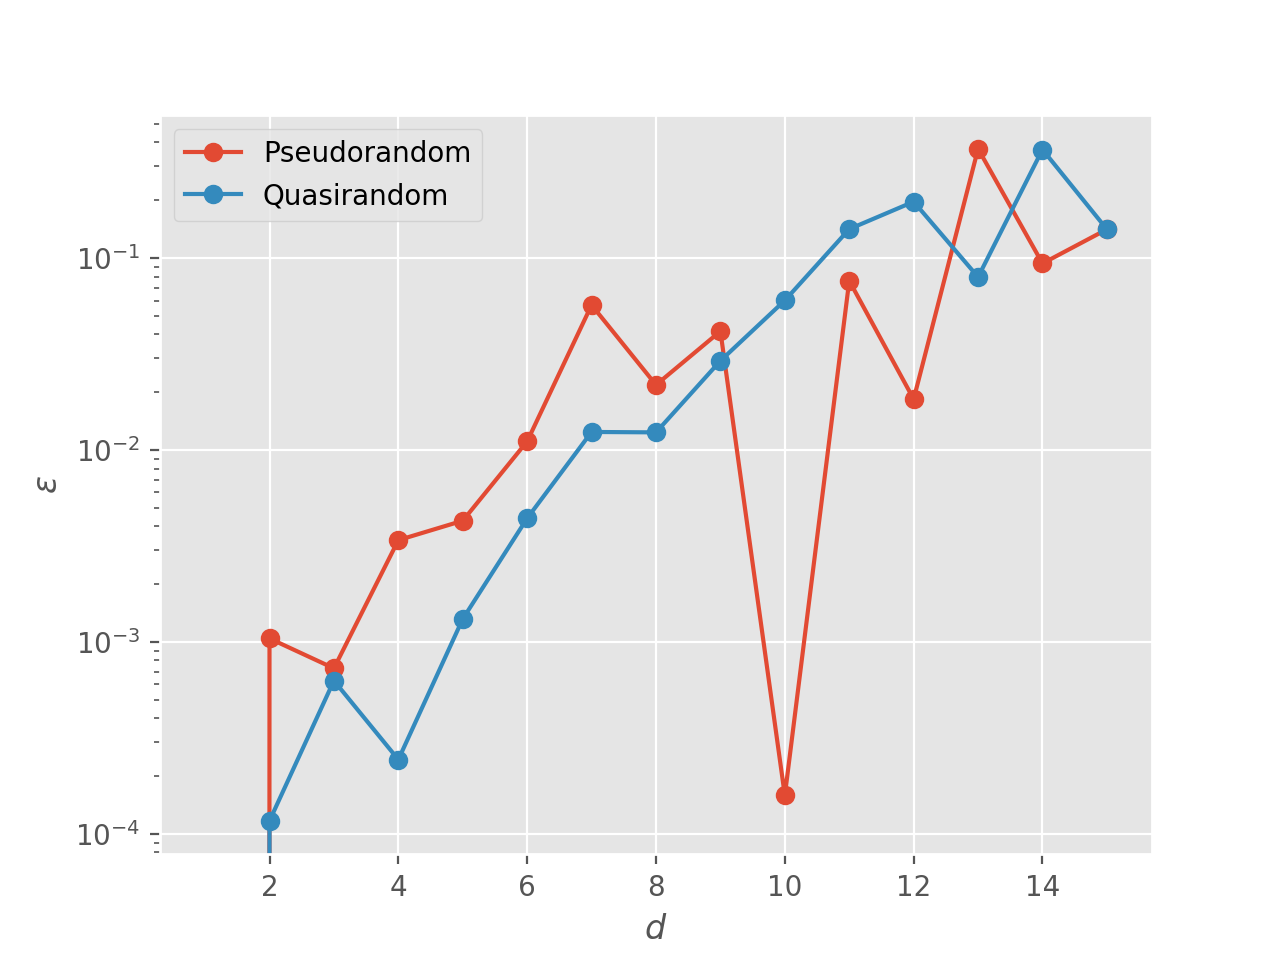

In [8]:
vol_s = [getSphereVolumeQuasirandom(N, d) for d in dim]

plt.figure()
plt.plot(dim, abs((vol - vol_r) / vol), 'o-', label='Pseudorandom')
plt.plot(dim, abs((vol - vol_s) / vol), 'o-', label='Quasirandom')
plt.legend()
plt.xlabel('$d$') 
plt.ylabel('$\epsilon$')
plt.yscale('log')

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Можно сказать, что при маленьких $d$ квазислучайные числа лучше считают объём сферы. Однако при дальнейшем увеличении размерности они уже проигрывают псевдослучайным числам (кроме последних двух точек графика). Также видно, что у квазислучайных чисел можно в некотором смысле предугадать ошибку, так как она растёт почти равномерно (в нормальных координатах она росла бы примерно экспоненциально), что совсем не работает с псевдослучайными числами, так как у них ошибка очень сильно скачет

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [9]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    return (-1)**np.around(np.random.rand(N, N))

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


Если в нашем случае энергия ячейки равна $-\sigma_i \sum \sigma_j$, то после изменения знака $\sigma_i$ изменение энергии будет равно $\Delta E_i = 2\sigma_i \sum \sigma_j$

In [10]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0]
    dE = 2 * state[i,j] * (state[(i+1)%N, j] + state[i, (j+1)%N] + state[i-1,j] + state[i,j-1])
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [11]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]
    ind = np.arange(N**2)
    np.random.shuffle(ind)
    getInd = lambda ind: (ind // N, ind % N)
    for i in ind:
        dE = getDeltaE(*getInd(i), state)
        if dE < 0:
            state[getInd(i)] *= -1
        else:
            if np.random.random() < np.exp(-dE / T):
                state[getInd(i)] *= -1
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [12]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = state.shape[0]
    E = 0
    for i in range(N):
        for j in range(N):
            E -= state[i, j] * (state[(i+1)%N, j] + state[i, (j+1)%N] + state[i-1,j] + state[i,j-1])
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [13]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [14]:
N       = 10         # размер решетки NxN
Nt      = 50         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


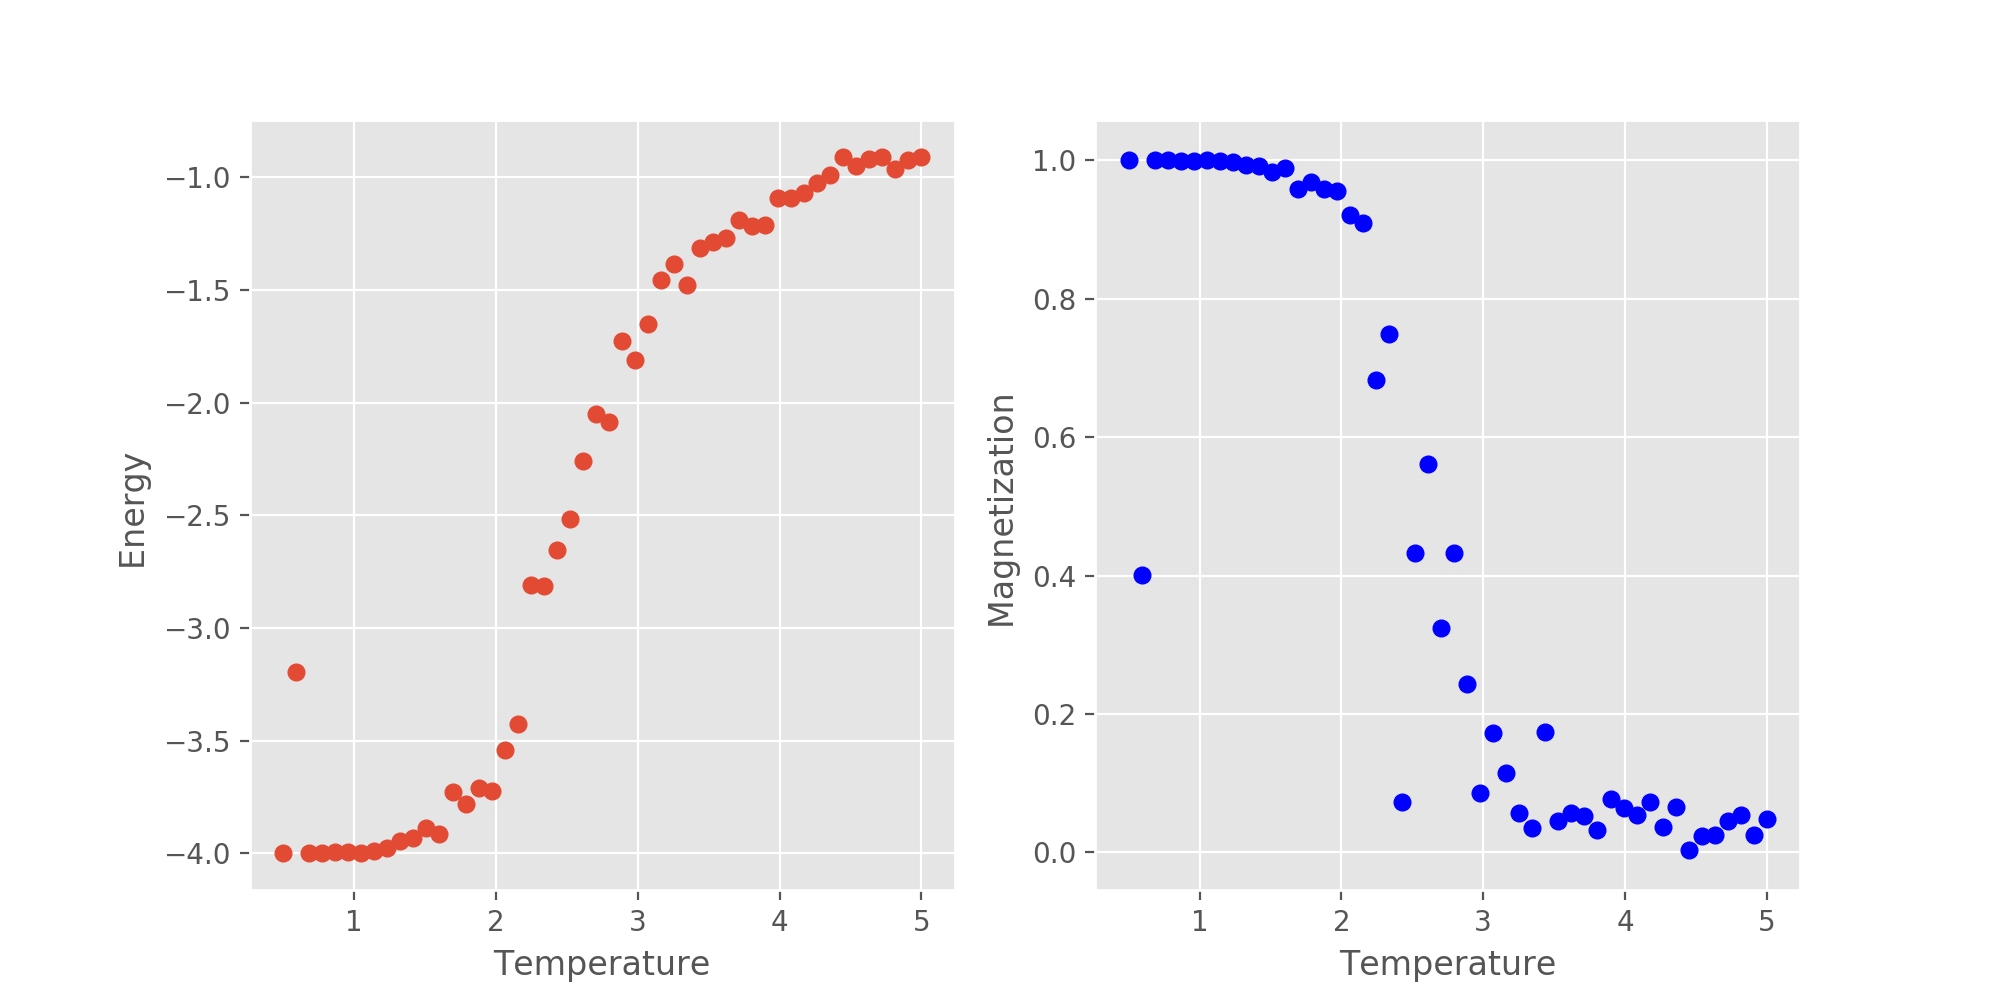

In [15]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Первый график показывает, что с увеличением температуры энергия системы растёт. На втором графике можно пронаблюдать явление размагничивания материала при увеличении температуры. Также правая половина этого графика похожа на поведение намагниченности дальше точки Кюри (но это неточно)

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [16]:
N = 64
state = getInitialState(N)

<IPython.core.display.Javascript object>


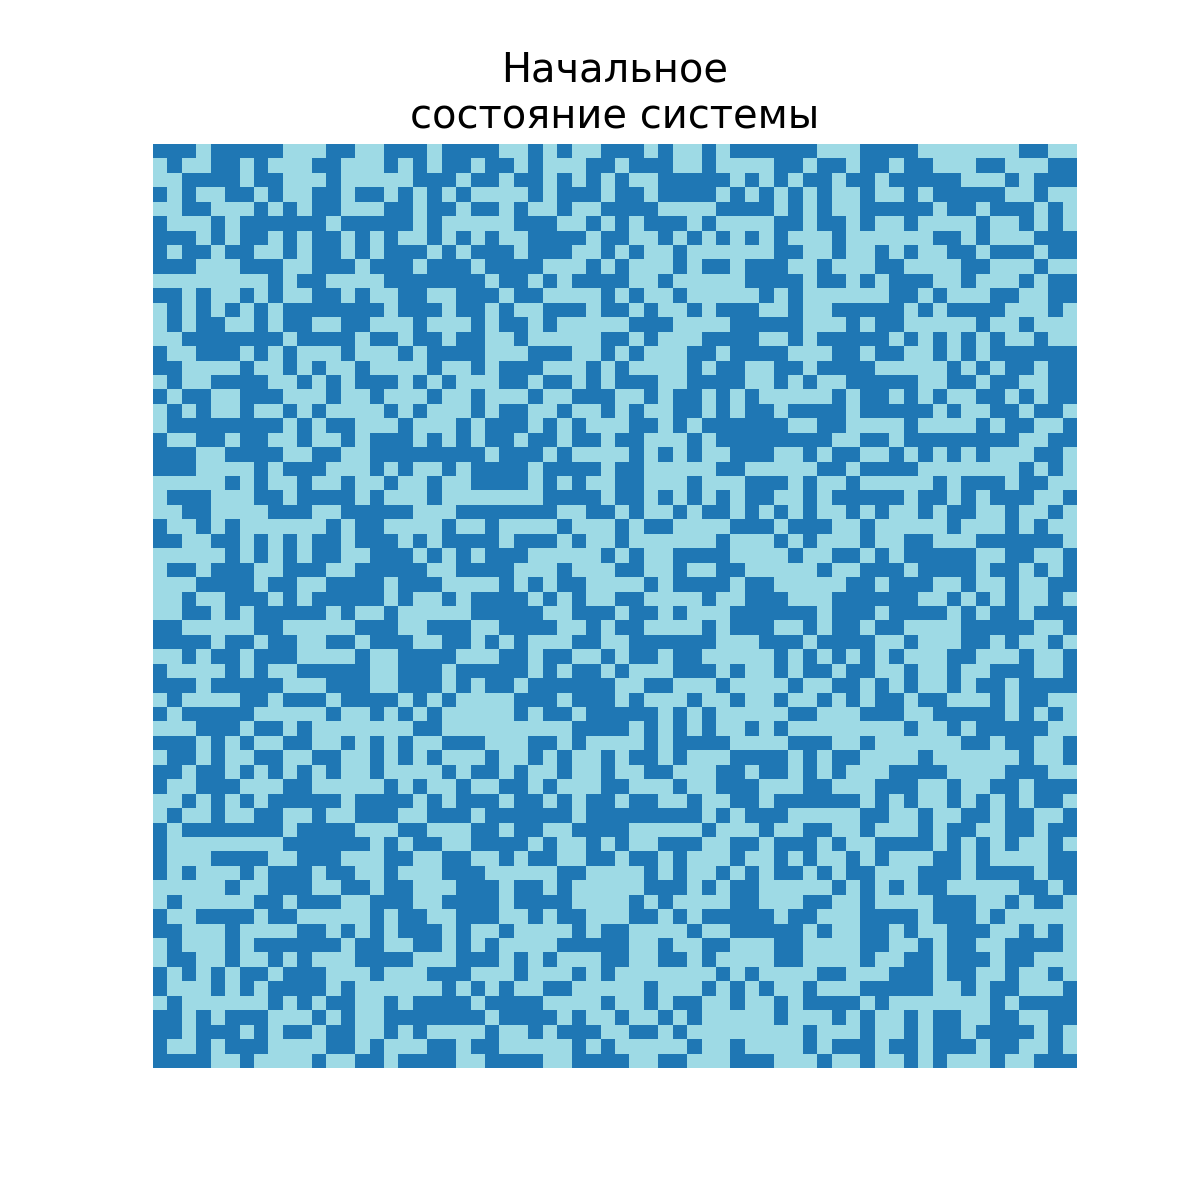

Text(0.5, 1.0, 'Начальное\nсостояние системы')

In [17]:
plt.figure(figsize=(6, 6))
plt.imshow(state, cmap='tab20')
plt.grid() 
plt.axis('off')
plt.title('Начальное\nсостояние системы')

<IPython.core.display.Javascript object>


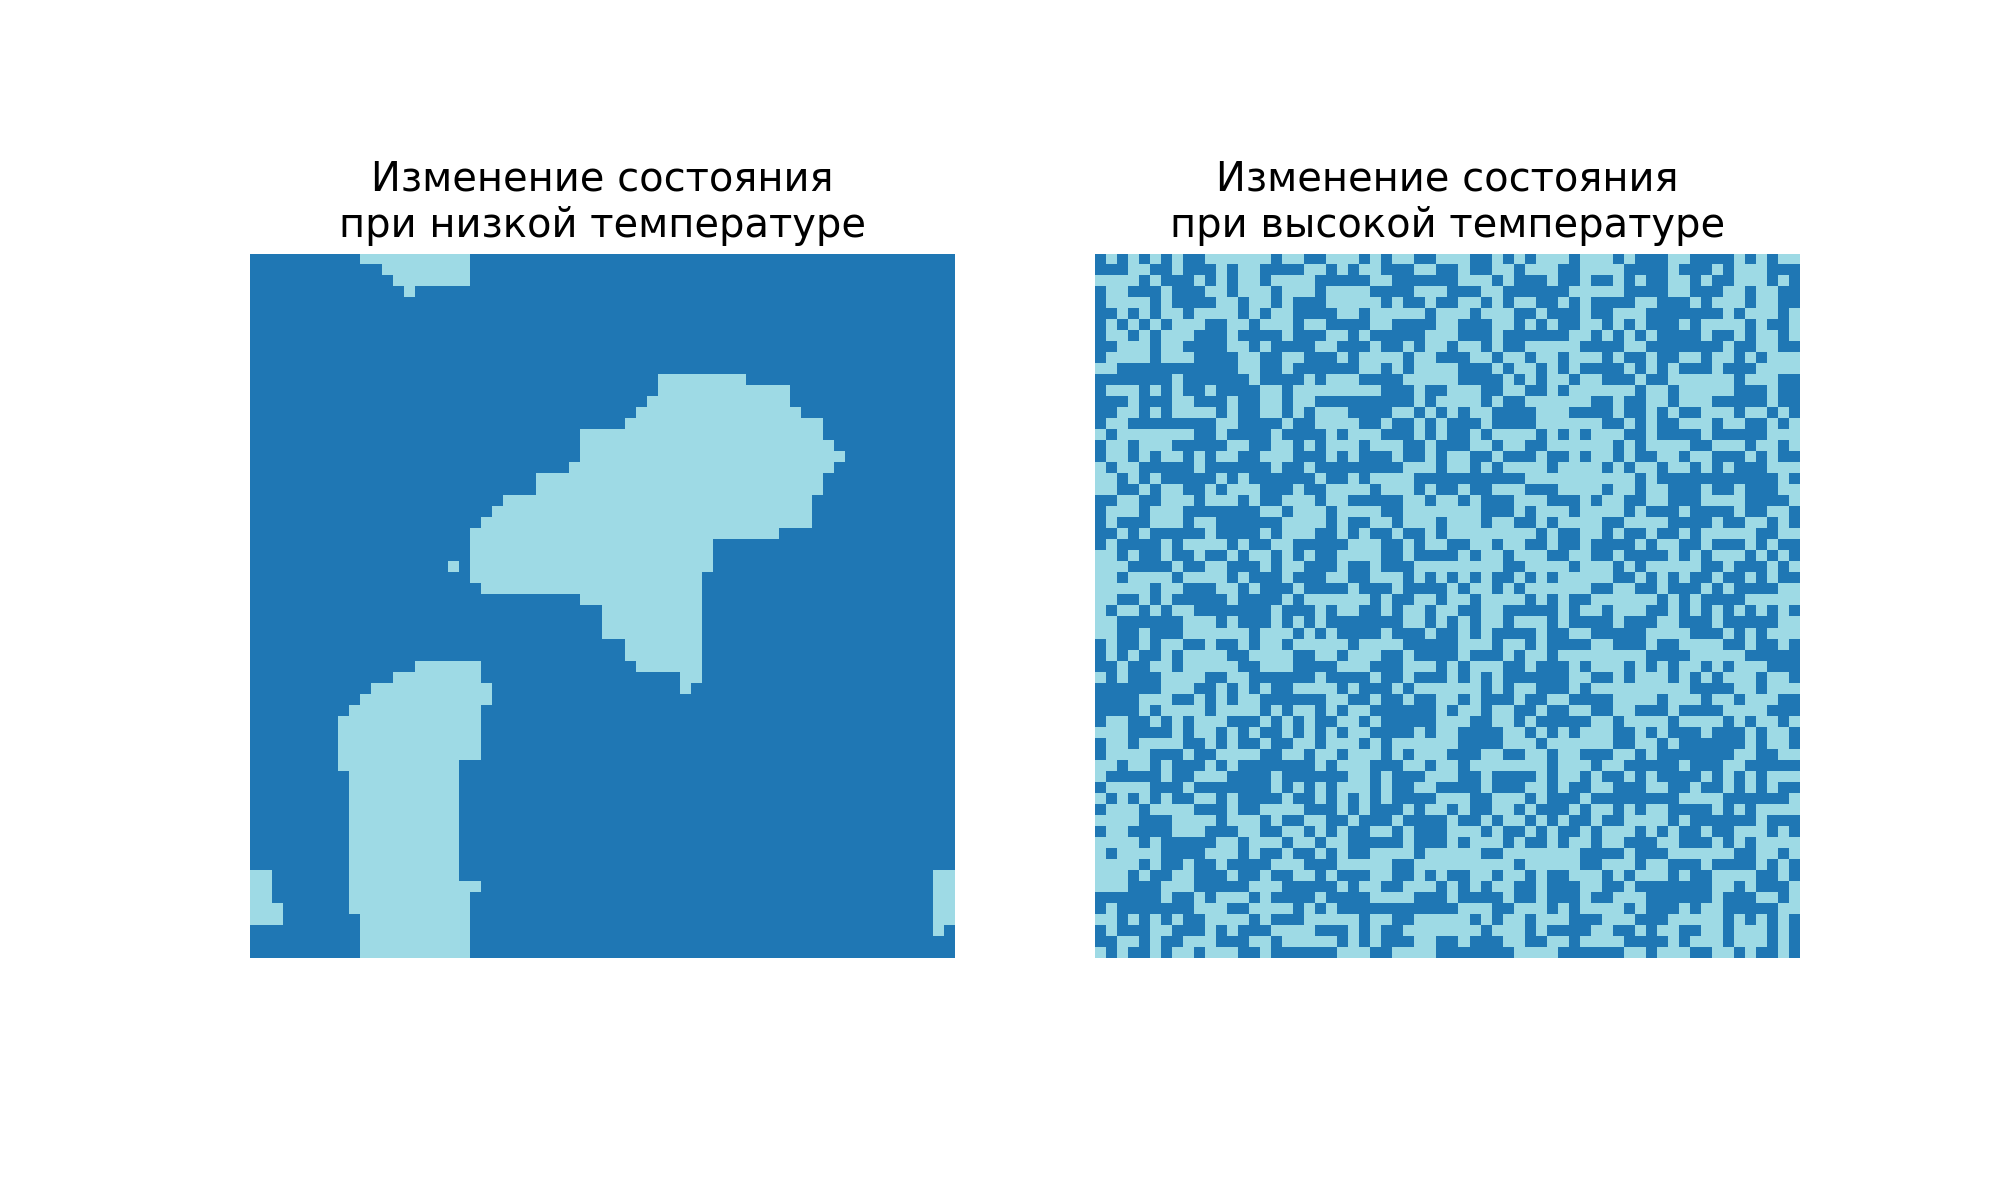

Text(0.5, 1.0, 'Изменение состояния\nпри высокой температуре')

In [18]:
st = 30

plt.figure(figsize=(10, 6))

T_low = 0.5
state_low = state
for _ in range(st):
    state_low = makeFlip(T_low, state_low)
plt.subplot(121)
plt.imshow(state_low, cmap='tab20')
plt.grid()
plt.axis('off')
plt.title('Изменение состояния\nпри низкой температуре')

T_high = 30
state_high = state
for _ in range(st):
    state_high = makeFlip(T_high, state_high)
plt.subplot(122)
plt.imshow(state_high, cmap='tab20')
plt.grid()
plt.axis('off')
plt.title('Изменение состояния\nпри высокой температуре')

При низкой температуре в ферромагнетиках формируются домены, что и видно на первом графике (области одного цвета = области с одинаково направленным спином). На втором графике видно, что при увеличении температуры связь между спинами ослабляется, и в материале исчезают большие области с одинаковой намагниченностью